# Problem 8

This problem asks you to engage with [the Howson-Urbach 'sample size' critique of the classical view](https://logic-teaching.github.io/philstatsbook/Chap08.html#on-sample-size).

The graph to the left and center replicate the graphs from our description of that critique, along with three values of $x$ being highlighted, namley $x=427$ and $x=475$ and $x=500$ (these are the three dotted black lines).

The graph to the right displays the Bayesian posterior upon observing value $x$, assuming that the Bayesian adopts a uniform prior over the null hypothesis and the alternative (i.e. she thinks that they are equally probable).

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import metakernel
import ipywidgets as widgets    
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
import networkx as nx
import seaborn as sns
pastel_colors = sns.color_palette("pastel")
from scipy.stats import nbinom, binom
from scipy.special import comb
 
import numpy as np                # load numpy package
import matplotlib.pyplot as plt   # load pyplot package
from scipy.stats import binom     # load binomial distribution

def Binomvisualalt(n,p,q,r,observed_value_1,observed_value_2, observed_value_3):

    s = 1-r

    v = np.arange(0, n) # values for x-axis
    Xpdf = binom.pmf(v, n, p) # pdf for X
    Xcdf = binom.cdf(v, n, p) # cdf for X
    Xccdf = 1-Xcdf               # ccdf for X
    Ypdf = binom.pmf(v, n, q) # pdf for Y
    Ycdf = binom.cdf(v, n, q) # cdf for Y
    Yccdf = 1-Ycdf               # ccdf for Y
    evidence = [r*Xpdf[i] + s*Ypdf[i] for i in range(n)]
    
    posteriorX = r*Xpdf/evidence
    posteriorY = s*Ypdf/evidence

    fig, axs = plt.subplots(1, 3, figsize=(10, 5))  # 1 row, 2 columns

    max_value = max(max(Xpdf), max(Ypdf))
    max_value_2 = max(max(posteriorX), max(posteriorY))

    axs[0].plot(v, Xpdf, label='%1.2f null' % p)
    axs[0].plot(v, Ypdf, label='%1.2f alternative' % q)
    axs[0].set_ylim(0, max_value+.1)
    axs[0].set_title('pdf of T_%i~ \n Binom(%i, %1.2f) vs. Binom(%i, %1.2f)' % (n,n,p, n, q))
    axs[0].axvline(x=observed_value_1, color='black', linestyle=':')
    axs[0].axvline(x=observed_value_2, color='black', linestyle=':')    
    axs[0].axvline(x=observed_value_3, color='black', linestyle=':')        
    axs[0].legend(loc='upper right') 

    axs[1].plot(v, Xpdf+Xccdf, label='Type I')
    axs[1].plot(v, Ycdf, color ='C1', label='Type II')
    axs[1].set_ylim(0, 1.1)
    axs[1].set_title('probability of \n Type I vs. II error \n as function of c')
    axs[1].set_xlabel('c')  # Add x-axis label
    axs[1].axhline(y=.05, color='r')
    axs[1].axvline(x=observed_value_1, color='black', linestyle=':')
    axs[1].axvline(x=observed_value_2, color='black', linestyle=':')    
    axs[1].axvline(x=observed_value_3, color='black', linestyle=':')      
    axs[1].legend(loc='upper right') 

    axs[2].plot(v, posteriorX, label='p(%1.2f|x)' % p)
    axs[2].plot(v, posteriorY, label='p(%1.2f|x)' % q)    
    axs[2].set_ylim(0, max_value_2+.1)
    axs[2].set_title('Bayesian posterior \n p(%1.2f|x) vs. p(%1.2f|x)' % (p, q))
    axs[2].set_xlabel('x')  # Add x-axis label
    axs[2].axhline(y=.05, color='r')
    axs[2].axvline(x=observed_value_1, color='black', linestyle=':')
    axs[2].axvline(x=observed_value_2, color='black', linestyle=':')    
    axs[2].axvline(x=observed_value_3, color='black', linestyle=':')      
    axs[2].legend(loc='center left')



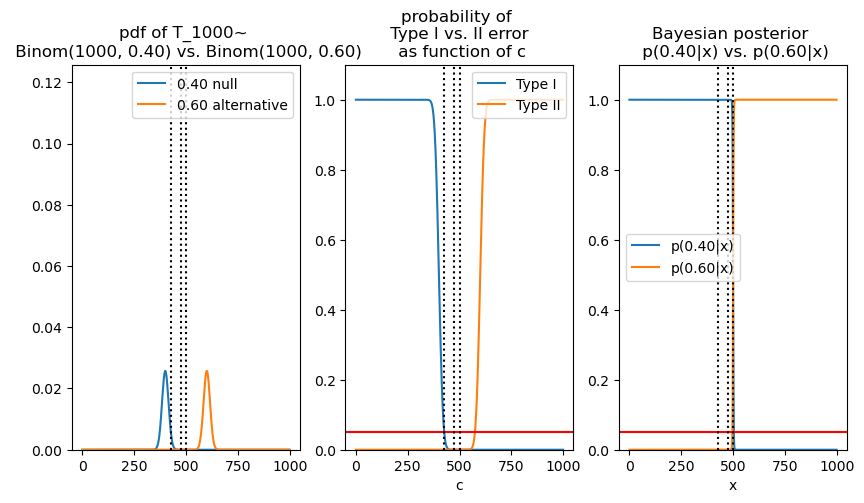

In [40]:
Binomvisualalt(1000, .4, .6, .5, 427, 475, 500)

To complete this problem: 

- describe what the classical view would say about the null hypothesis upon observing the three displayed values of $x$.

- describe what the Bayesian view would say about the null hypothesis upon observing the three displayed values of $x$.

- in one short paragraph describe whether this supports or complicates Howson-Urbach's claim that 

> an unprejudiced consideration would clearly lead to the conclusion that [for such high values of $n$], the supposedly critical values [like 427] *support* [$H_0$, the null hypothesis] more and more ({cite}`Howson2006-oy` p. 154, their $h_1$ switched to our $H_0$).

- Finally, write 1-2 complete English sentences on whether your views change in light of alternations to the Bayesian prior, described in the next section

## Effects of non-uniformity of the prior

We consider two variations on the above graph, where we change the rightmost graph by changing from a uniform prior to a non-uniform prior.

Here is a version where the Bayesian gives the null hypothesis great weight .9 and the alternative .1

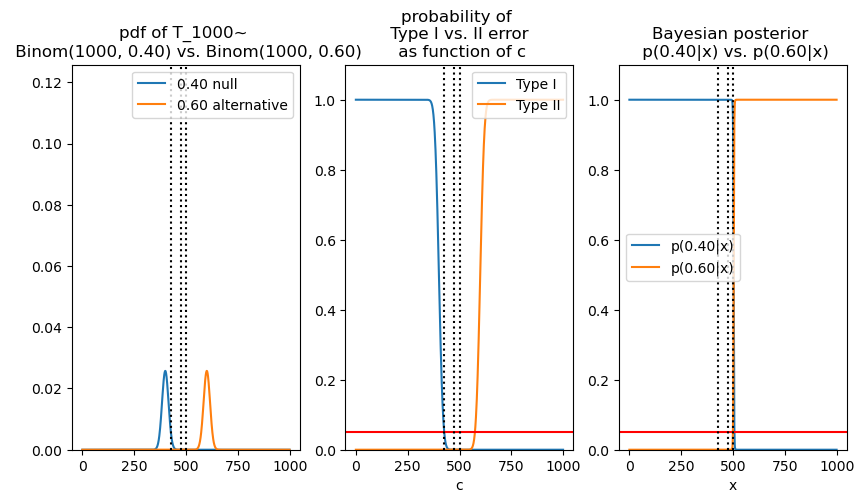

In [41]:
Binomvisualalt(1000, .4, .6, .9, 427, 475, 500)

Here is a version where the Bayesian gives the alternative hypothesis great weight .9 and the null hypothesis .1

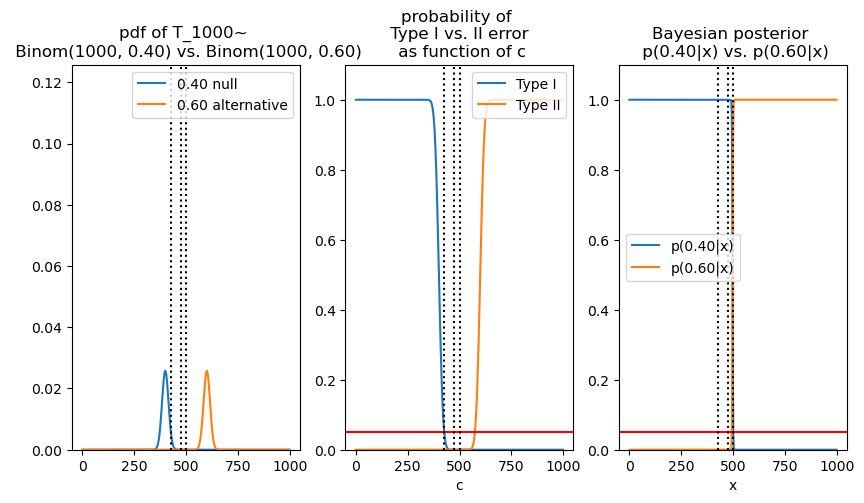

In [42]:
Binomvisualalt(1000, .4, .6, .1, 427, 475, 500)